## Introduction to Decision Trees

Decision Trees are a popular machine learning algorithm used for both classification and regression tasks. They are structured as a tree, consisting of nodes that form the decision criteria, and leaves that represent the outcomes.

![Decision Tree](Decision_Trees.png)

Source: https://devopedia.org/decision-trees-for-machine-learning

#### Components of a Decision Tree:

- **Root Node**: This is the first node of the tree from which all other nodes branch out. It represents the entire dataset being analyzed.
- **Decision Node**: These are the nodes that split into further nodes. Each decision node represents a decision rule that is based on the input features.
- **Leaf Node**: These nodes represent the outcome or the final decision. In a classification task, each leaf node represents a class.

The tree makes decisions by splitting data starting from the root node, using the most significant features identified according to criteria like Gini impurity or information gain, and continues splitting until it meets a stopping condition or all the data points at a node belong to the same class.

#### Dataset Exploration

Understanding the dataset is crucial before applying any machine learning model. We'll first explore the structure of the HR analytics dataset, identify the types of data it contains, and prepare it for the modeling process.


In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HR_analytics.csv')

# Display the first few rows of the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
# Display the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [28]:
# Statistical summary of numerical features
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [29]:
# Count of unique values in each categorical column
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
Over18
Y    1470
Name: count,

In [30]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Applying Decision Trees to Predict Employee Attrition

With a good understanding of the dataset, we can now proceed to use the Decision Tree algorithm to predict employee attrition. This involves encoding categorical variables, splitting the data, and training a Decision Tree model.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('HR_analytics.csv')

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

#### Visualization of the Decision Tree
One of the greatest things about the Decision Tree algorithm is that it provides a visual map of how the algorithm learned to classify the variables. From this visualization, it is easy to follow how a predicition is made by the algorithm. Let's plot the decision tree in the following python cell

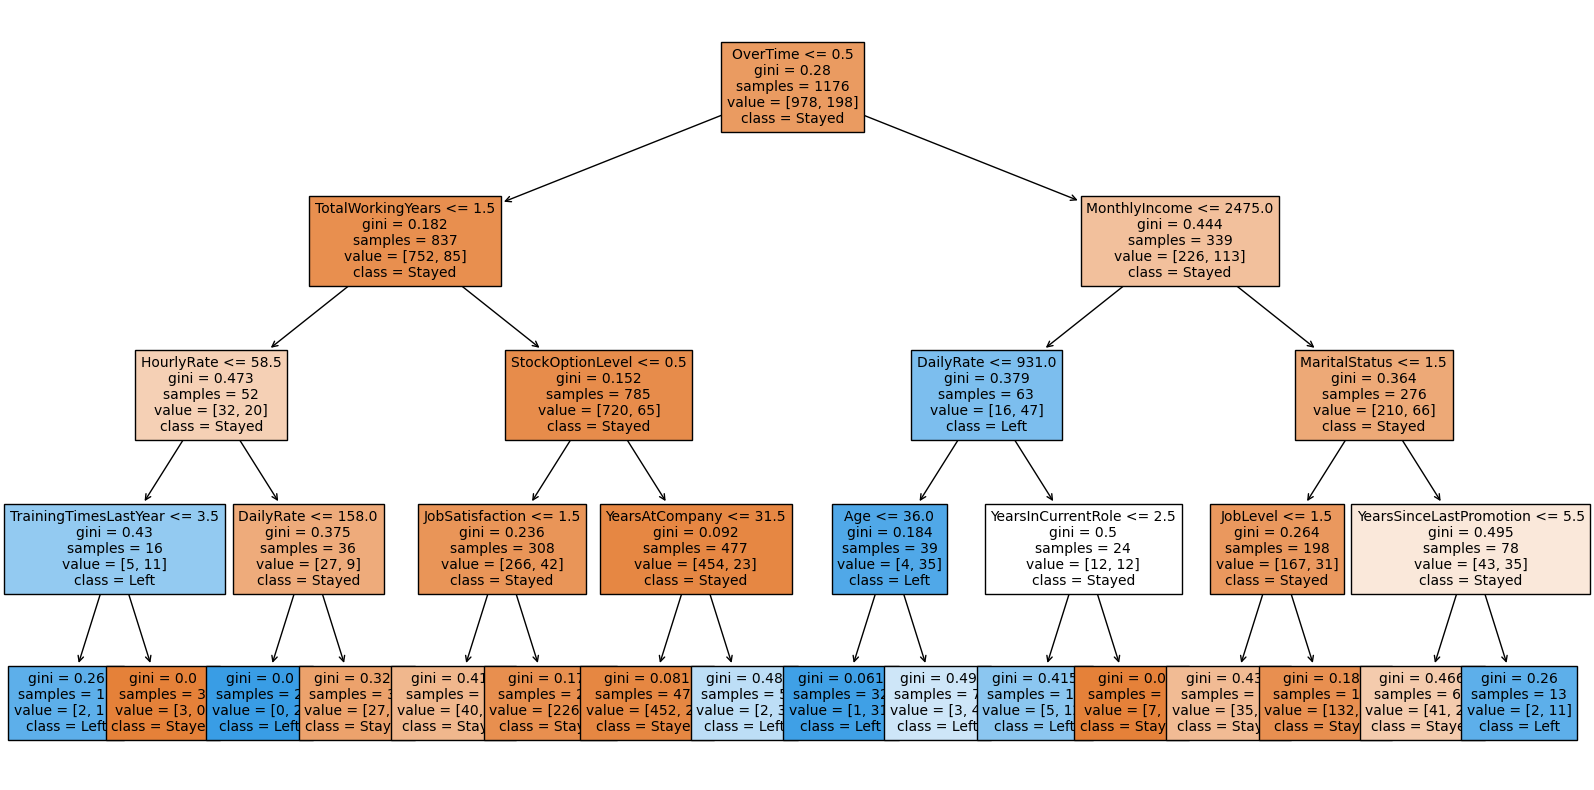

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert the columns index to a list
feature_names_list = X.columns.tolist()

# Assuming the classes are 0 and 1 and correspond to 'Stayed' and 'Left'
class_labels = ['Stayed', 'Left']  # Adjust based on the output from df['Attrition'].unique()

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=feature_names_list, class_names=class_labels, fontsize=10)
plt.show()


Having seen how the tree got constructed by the algorithm let's check its accuracy and confusion matrix:

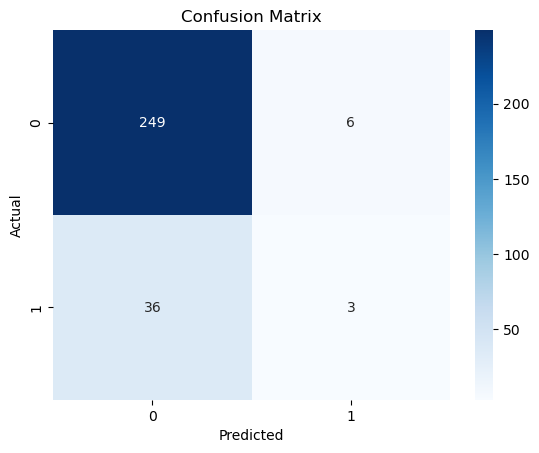

In [38]:
# Predict the target variable
y_pred = tree_model.predict(X_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# Classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred, target_names=class_labels)
print(class_report)

              precision    recall  f1-score   support

      Stayed       0.87      0.98      0.92       255
        Left       0.33      0.08      0.12        39

    accuracy                           0.86       294
   macro avg       0.60      0.53      0.52       294
weighted avg       0.80      0.86      0.82       294



Let's now check the feature importance. This will tell us which features have a strong influence on the classification. The importance values are normalized to sum to 1 (or 100%), with higher values indicating greater importance in predicting the target variable. The features are  sorted in descending order of importance, so the features at the top contribute most to the model's predictions.

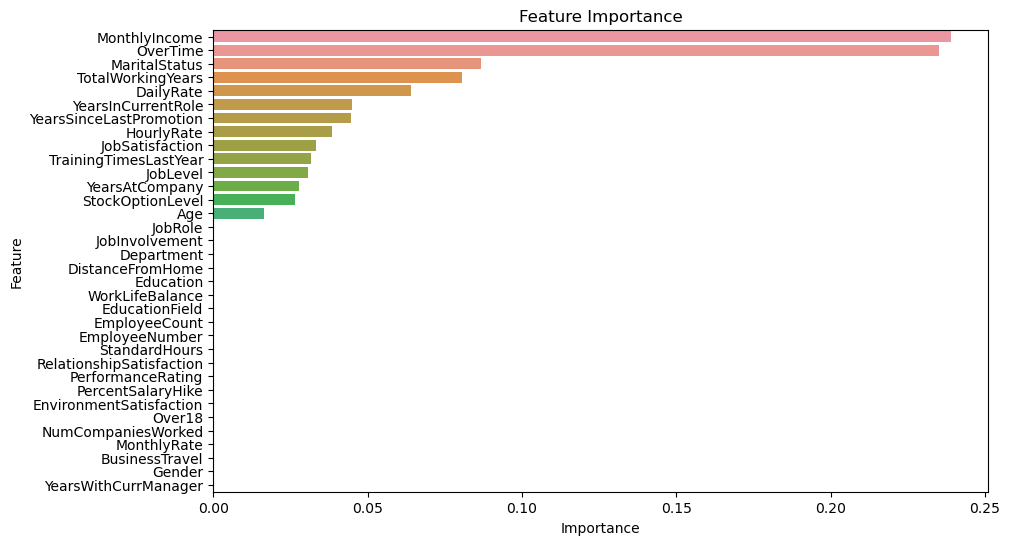

                    Feature  Importance
17            MonthlyIncome    0.239075
21                 OverTime    0.235130
16            MaritalStatus    0.086638
27        TotalWorkingYears    0.080586
2                 DailyRate    0.064178
31       YearsInCurrentRole    0.044816
32  YearsSinceLastPromotion    0.044699
11               HourlyRate    0.038460
15          JobSatisfaction    0.033250
28    TrainingTimesLastYear    0.031658


In [43]:
# Feature importance
feature_importance = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names_list, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance') 
plt.show()

# Print out feature importance values
print(feature_importance_df.head(10))

#### Key Takeaways
* MonthlyIncome and OverTime are the most important features, with importance scores of approximately 0.239 and 0.235 respectively. This suggests that these two features significantly impact the model's predictions.
* Other important features include MaritalStatus, TotalWorkingYears, DailyRate, and so on, though their importances are considerably lower compared to MonthlyIncome and OverTime.
* Many features such as JobRole, JobInvolvement, Education, and others have an importance of 0.0. This indicates that shuffling these features does not affect the model's performance, suggesting they do not contribute useful information for predicting the target in the context of this model.

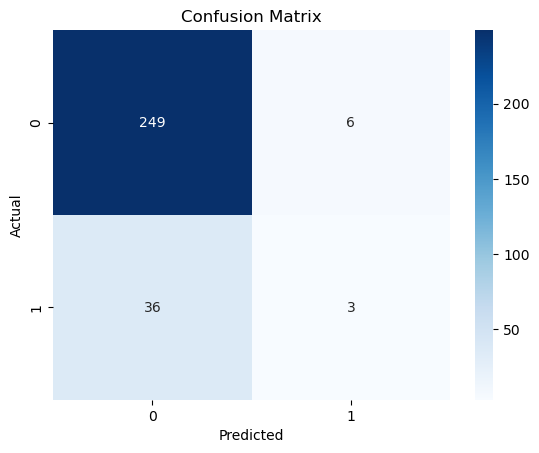

              precision    recall  f1-score   support

      Stayed       0.87      0.98      0.92       255
        Left       0.33      0.08      0.12        39

    accuracy                           0.86       294
   macro avg       0.60      0.53      0.52       294
weighted avg       0.80      0.86      0.82       294



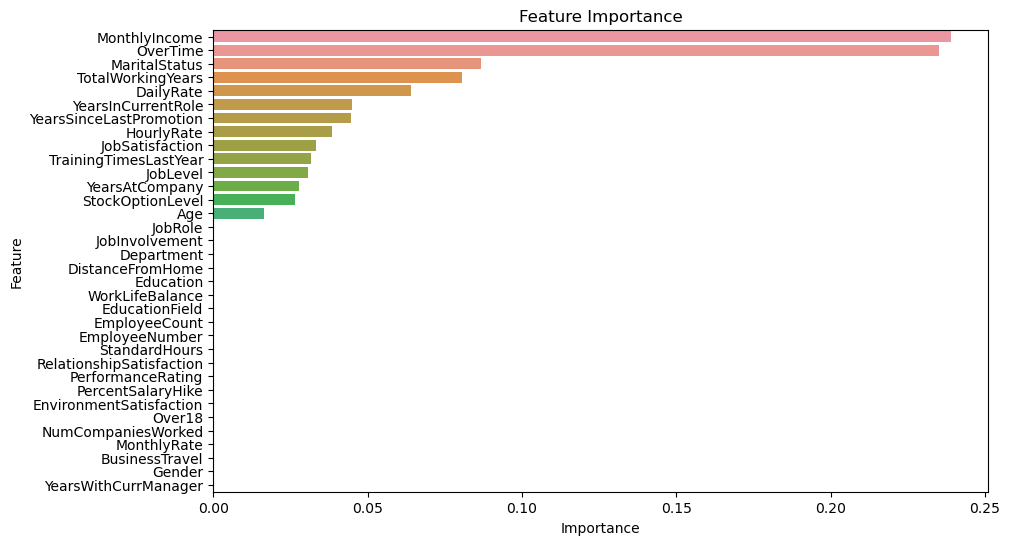

                    Feature  Importance
17            MonthlyIncome    0.239075
21                 OverTime    0.235130
16            MaritalStatus    0.086638
27        TotalWorkingYears    0.080586
2                 DailyRate    0.064178
31       YearsInCurrentRole    0.044816
32  YearsSinceLastPromotion    0.044699
11               HourlyRate    0.038460
15          JobSatisfaction    0.033250
28    TrainingTimesLastYear    0.031658


In [63]:
#Let's select the top 5 features and train the model again by using a function to automate the process.

def train_decision_tree(X_train, y_train, X_test, y_test, max_depth=4):
    # Initialize the Decision Tree Classifier
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Fit the model
    tree_model.fit(X_train, y_train)

    # Predict the target variable
    y_pred = tree_model.predict(X_test)

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    class_report = classification_report(y_test, y_pred, target_names=class_labels)
    print(class_report)

    # Feature importance
    feature_importance = tree_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': feature_names_list, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()

    # Print out feature importance values
    print(feature_importance_df.head(10))
    
    return tree_model


# Define features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
tree_model = train_decision_tree(X_train, y_train, X_test, y_test, max_depth=4)



The model performed the same with or without the inclusion of several features, indicating that these features may not be necessary for making accurate predictions and can potentially be excluded from the model to simplify it and improve computational efficiency. This observation underscores the importance of feature selection in machine learning, which can lead to more efficient, interpretable, and potentially more generalizable models. By focusing on the most informative features, such as MonthlyIncome and OverTime, we can ensure that the model is not only faster but also less prone to overfitting, making it more robust in varied scenarios or when deployed in production environments.

#### Conclusion

In this notebook, we explored the application of Decision Trees to predict employee attrition using an HR analytics dataset. Our analysis began with a thorough exploration of the dataset, followed by preprocessing steps such as encoding categorical variables and splitting the dataset into training and testing sets. We then trained a Decision Tree model and evaluated its performance.